# Importing Libraries

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the predictions

In [234]:
positive_2021 = pd.read_excel("D:\\MSc\\Term 3 - Dissertation\\Proj_in_VS\\PositiveComments2021.xlsx")
negative_2021 = pd.read_excel("D:\\MSc\\Term 3 - Dissertation\\Proj_in_VS\\NegativeComments2021.xlsx")
positive_2022 = pd.read_excel("D:\\MSc\\Term 3 - Dissertation\\Proj_in_VS\\PositiveComments2022.xlsx")
negative_2022 = pd.read_excel("D:\\MSc\\Term 3 - Dissertation\\Proj_in_VS\\NegativeComments2022.xlsx")
positive_2023 = pd.read_excel("D:\\MSc\\Term 3 - Dissertation\\Proj_in_VS\\PositiveComments2023.xlsx")
negative_2023 = pd.read_excel("D:\\MSc\\Term 3 - Dissertation\\Proj_in_VS\\NegativeComments2023.xlsx")

In [235]:
categories = ['Overall', 'Covid-19 pandemic', 'Teaching', 'Learning opportunities', 
              'Assessment and feedback', 'Academic staff and support', 
              'Organisation and management', 'Learning resources', 
              'Learning community', 'Student voice', 'Student Union and related']

# Aggreggating the Data


In [236]:
def aggregate_data(df, year, sentiment):
    aggregated = df[categories].sum().reset_index()
    aggregated.columns = ['Category', 'Count']
    aggregated['Year'] = year
    aggregated['Sentiment'] = sentiment
    aggregated['Percentage'] = (aggregated['Count'] / len(df)) * 100
    return aggregated

# Aggregate for each year
positive_agg_2021 = aggregate_data(positive_2021, 2021, 'Positive')
positive_agg_2022 = aggregate_data(positive_2022, 2022, 'Positive')
positive_agg_2023 = aggregate_data(positive_2023, 2023, 'Positive')

negative_agg_2021 = aggregate_data(negative_2021, 2021, 'Negative')
negative_agg_2022 = aggregate_data(negative_2022, 2022, 'Negative')
negative_agg_2023 = aggregate_data(negative_2023, 2023, 'Negative')


# Concatenating data of all years and sentiment
all_data = pd.concat([positive_agg_2021, positive_agg_2022, positive_agg_2023,
                      negative_agg_2021, negative_agg_2022, negative_agg_2023])

In [237]:

# Trying to combine all the years together

#df_temp = all_data[all_data['Year']==2021]['Category']
#df_trial = pd.DataFrame(all_data.loc[(all_data['Year']==2021) & (all_data['Sentiment']=='Negative')][['Count']]+all_data.loc[(all_data['Year']==2021) & (all_data['Sentiment']=='Positive')][['Count']])
#df_trial['Category'] = all_data[all_data['Year']==2021]['Category']
#all_data[['Count']][(all_data['Year']==2021) & (all_data['Sentiment']=='Positive')]+all_data[(all_data['Year']==2021) & (all_data['Sentiment']=='Negative')]

# Common Theme Setup

In [238]:
# These are the shade of Blue and Red to be used in the graphs below
sns.set_theme(style="whitegrid")
rb_colour = ["#4285f4","#cb2424"]
br_colour = ["#cb2424","#4285f4"]
rg_colour = ["#cb2424","#77ab46"]
gr_colour = ["#77ab46","#cb2424"]

# Plotting Graphs

## Bar Graph

In [239]:
# Cumulative of Year 2021, 2022 and 2023 - For some reason, the amount is coming out to be wrong. Find out

# plt.figure(figsize=(14, 8))

# sns.barplot(x='Year', y='Count', hue='Sentiment', data=all_data, errorbar=None, palette=rb_colour, edgecolor='w')

# plt.title('Number of Positive and Negative Comments per Year 2021-2023', fontsize=16)
# plt.xlabel('Year', fontsize=14)
# plt.ylabel('Number of Comments', fontsize=14)
# plt.legend(title='Sentiment', fontsize=12)

# #plt.tight_layout()
# plt.show()

In [240]:
def barplotForYear(year):
    plt.figure(figsize=(16, 8))
    sns.catplot(
        x='Count', y='Category', hue='Sentiment', col='Year',
        data=all_data[all_data['Year']==year], kind='bar', height=6, aspect=2, palette=gr_colour
    )
    plt.subplots_adjust(top=0.85)
    plt.suptitle(f'Number of Positive and Negative Comments per Category (For Year {year})', fontsize=16)
    plt.show()

<Figure size 1600x800 with 0 Axes>

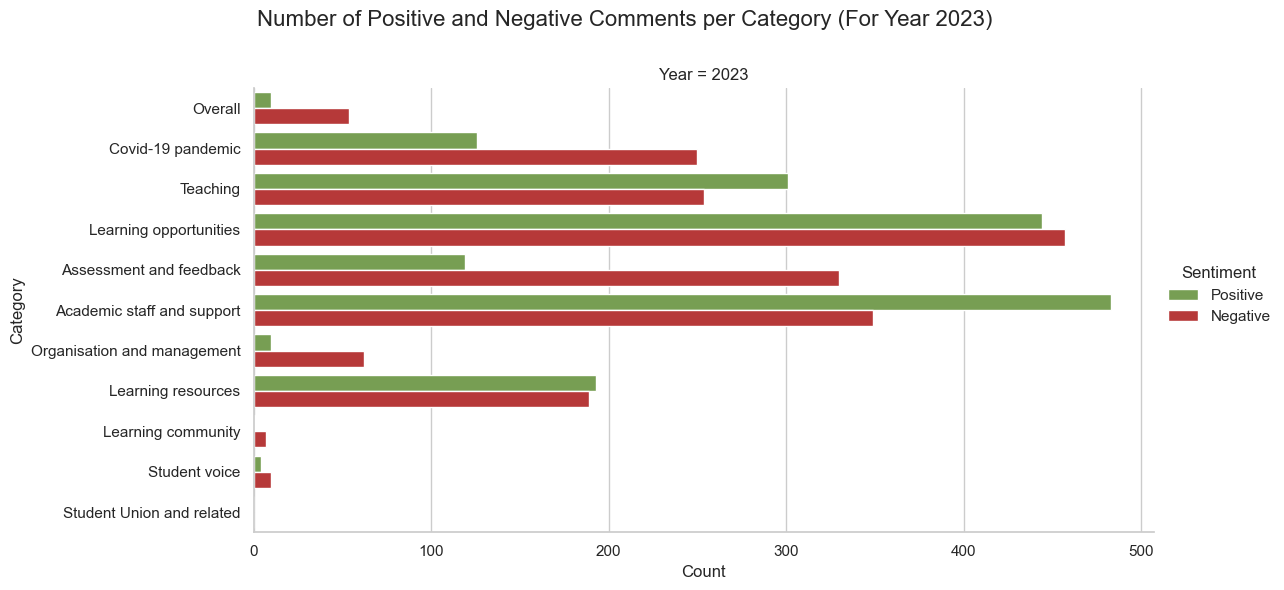

In [241]:
barplotForYear(2023)

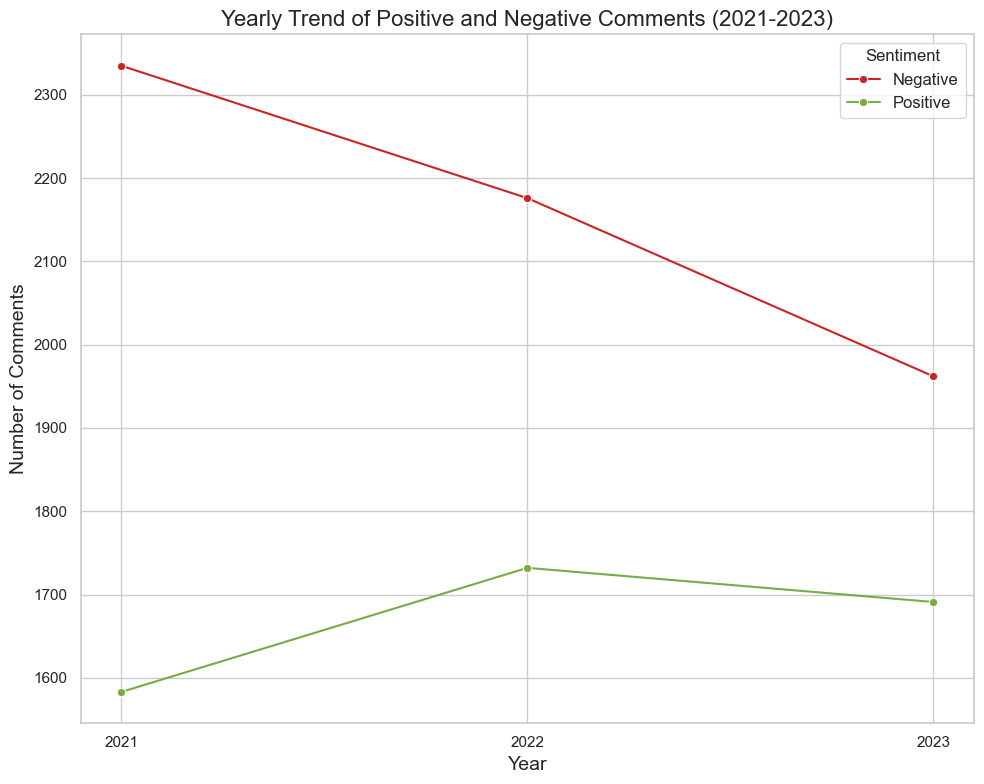

In [242]:
yearly_trend = all_data.groupby(['Year', 'Sentiment'])['Count'].sum().reset_index()

plt.figure(figsize=(10, 8))
sns.lineplot(x='Year', y='Count', hue='Sentiment', data=yearly_trend, marker='o', palette=rg_colour)

plt.title('Yearly Trend of Positive and Negative Comments (2021-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Comments', fontsize=14)
plt.legend(title='Sentiment', fontsize=12)

ax = plt.gca()

# Set the x-ticks to the desired years
ax.set_xticks([2021, 2022, 2023])

plt.tight_layout()
plt.show()


In [243]:
# Right now this is only vertical version of the bar graph above. But i want to convert it into Cumulative of all Years

# category_comparison = all_data.groupby(['Category', 'Year', 'Sentiment'])['Count'].sum().reset_index()

# plt.figure(figsize=(16, 10))
# sns.barplot(x='Category', y='Count', hue='Sentiment', data=category_comparison, palette=br_colour, errorbar=None)

# plt.title('Category Comparison of Positive and Negative Comments (2021-2023)', fontsize=16)
# plt.xlabel('Category', fontsize=14)
# plt.ylabel('Number of Comments', fontsize=14)
# plt.legend(title='Sentiment', fontsize=12)
# plt.xticks(rotation=90)

# plt.tight_layout()
# plt.show()


In [244]:
def plot_pie_chart(category, year):
    data = all_data[(all_data['Category'] == category) & (all_data['Year'] == year)]
    sentiment_counts = data.groupby('Sentiment')['Count'].sum()

    plt.figure(figsize=(6, 6))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90,explode=[0.05,0.05],colors=rg_colour)

    plt.title(f'Sentiment Proportion for {category} in {year}', fontsize=16)

    plt.show()

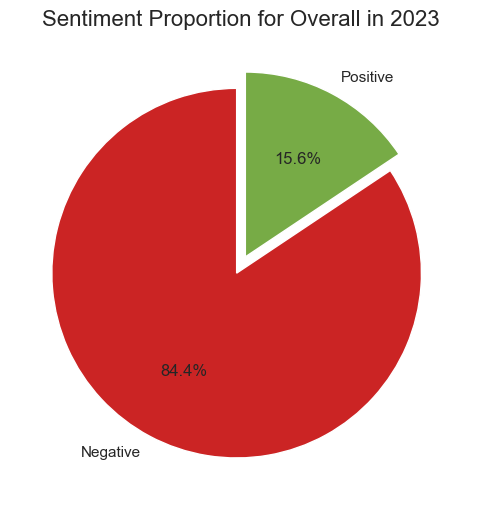

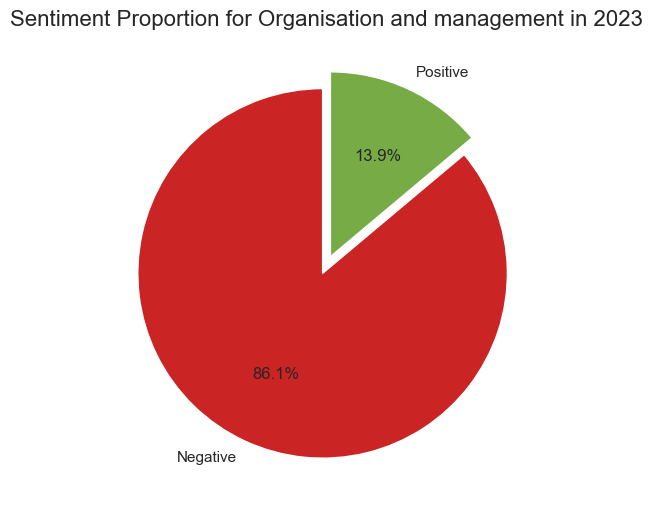

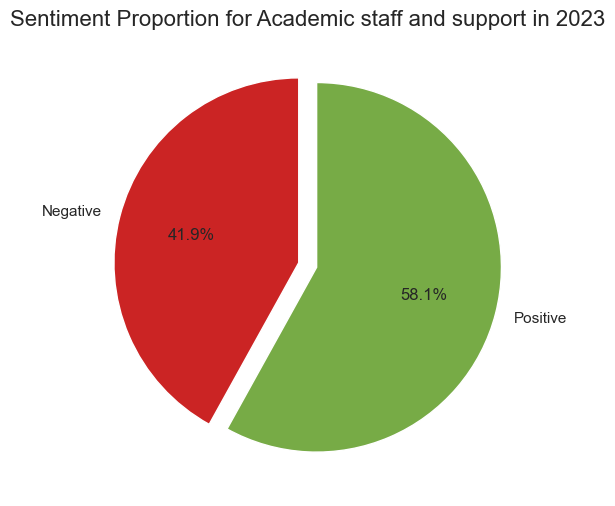

In [245]:
plot_pie_chart('Overall', 2023)
plot_pie_chart('Organisation and management',2023)
plot_pie_chart('Academic staff and support',2023)

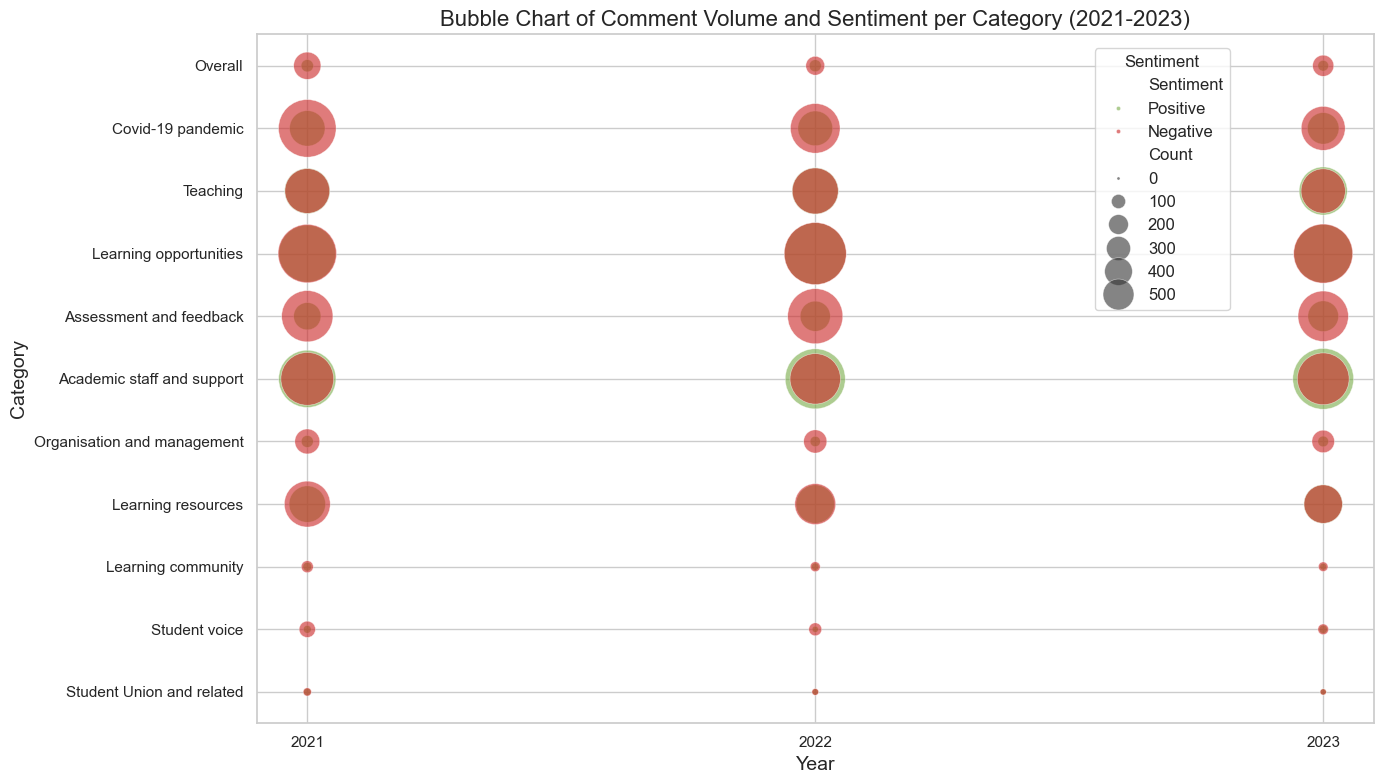

In [277]:
plt.figure(figsize=(14, 8))

sns.scatterplot(
    x='Year', y='Category', size='Count', hue='Sentiment', 
    data=all_data, palette=gr_colour, sizes=(20, 2000), legend='brief', alpha=0.6
)

plt.title('Bubble Chart of Comment Volume and Sentiment per Category (2021-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.legend(title='Sentiment', fontsize=12, loc=(0.75,0.6), markerscale=0.5)

ax = plt.gca()
ax.set_xticks([2021, 2022, 2023])

plt.tight_layout()
plt.show()


<Figure size 1600x800 with 0 Axes>

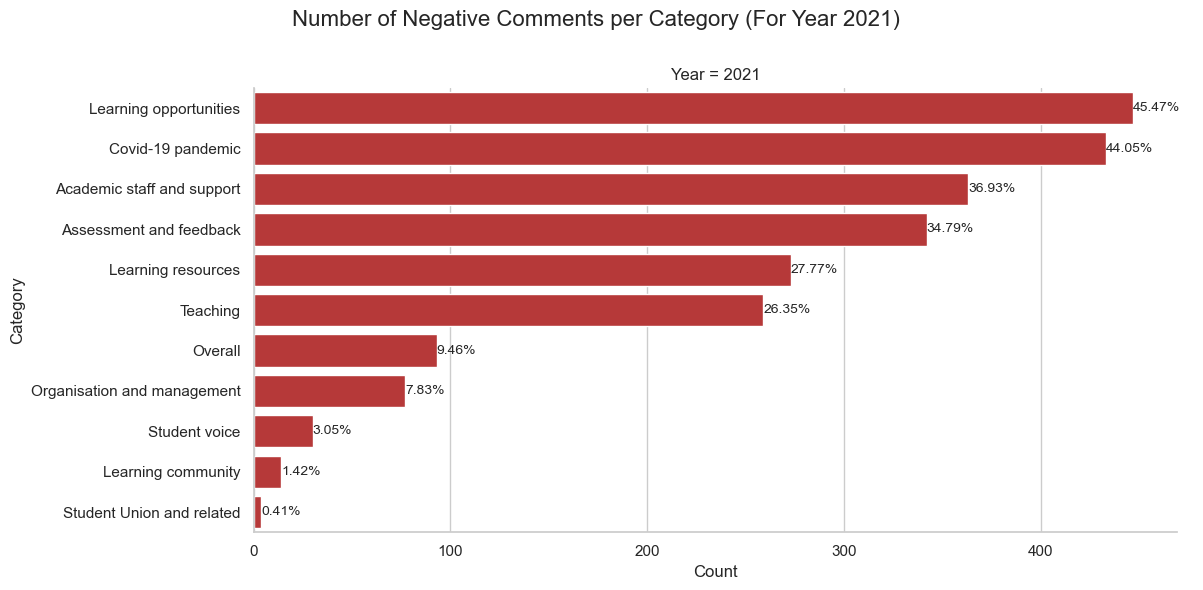

In [247]:
filtered_data = all_data[(all_data['Year'] == 2021) & (all_data['Sentiment'] == 'Negative')]

sorted_data = filtered_data.sort_values(by='Count', ascending=False)

plt.figure(figsize=(16, 8))
ax = sns.catplot(
    x='Count', y='Category', col='Year',
    data=sorted_data, kind='bar', height=6, aspect=2,color=rg_colour[0]
)
plt.subplots_adjust(top=0.85)

for ax in ax.axes.flat:
    for p, percentage in zip(ax.patches, sorted_data['Percentage']):
        ax.annotate(f"{percentage:.2f}%",
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10)

plt.suptitle(f'Number of Negative Comments per Category (For Year 2021)', fontsize=16)
plt.show()

<Figure size 1600x800 with 0 Axes>

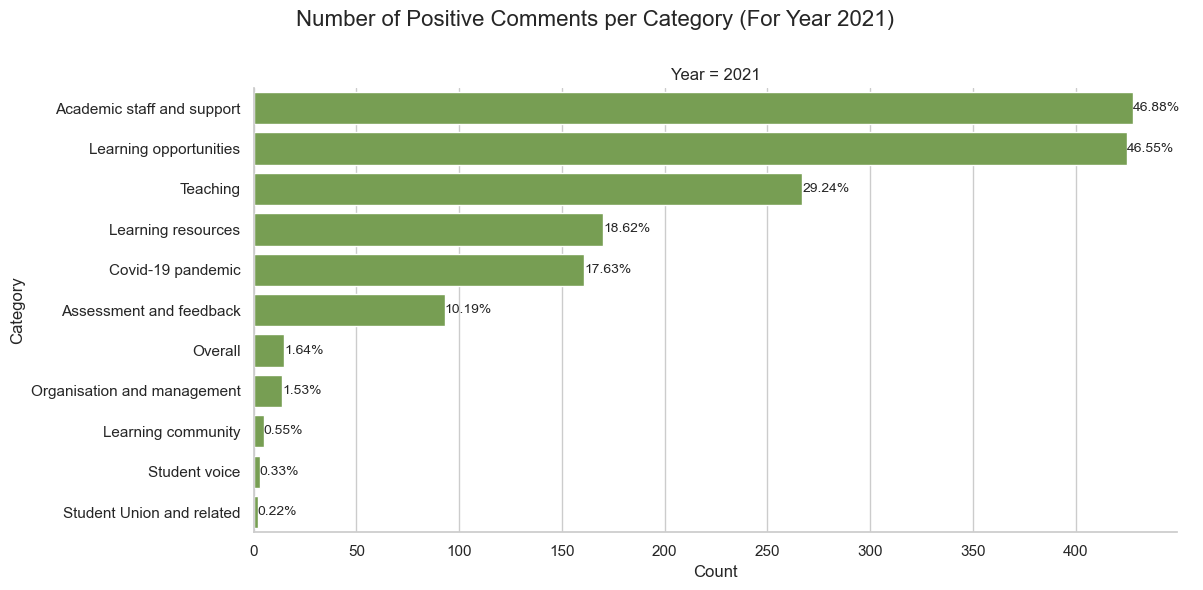

In [248]:
filtered_data = all_data[(all_data['Year'] == 2021) & (all_data['Sentiment'] == 'Positive')]

sorted_data = filtered_data.sort_values(by='Count', ascending=False)

plt.figure(figsize=(16, 8))
ax = sns.catplot(
    x='Count', y='Category', col='Year',
    data=sorted_data, kind='bar', height=6, aspect=2,color=rg_colour[1]
)
plt.subplots_adjust(top=0.85)

for ax in ax.axes.flat:
    for p, percentage in zip(ax.patches, sorted_data['Percentage']):
        ax.annotate(f"{percentage:.2f}%",
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10)

plt.suptitle(f'Number of Positive Comments per Category (For Year 2021)', fontsize=16)
plt.show()

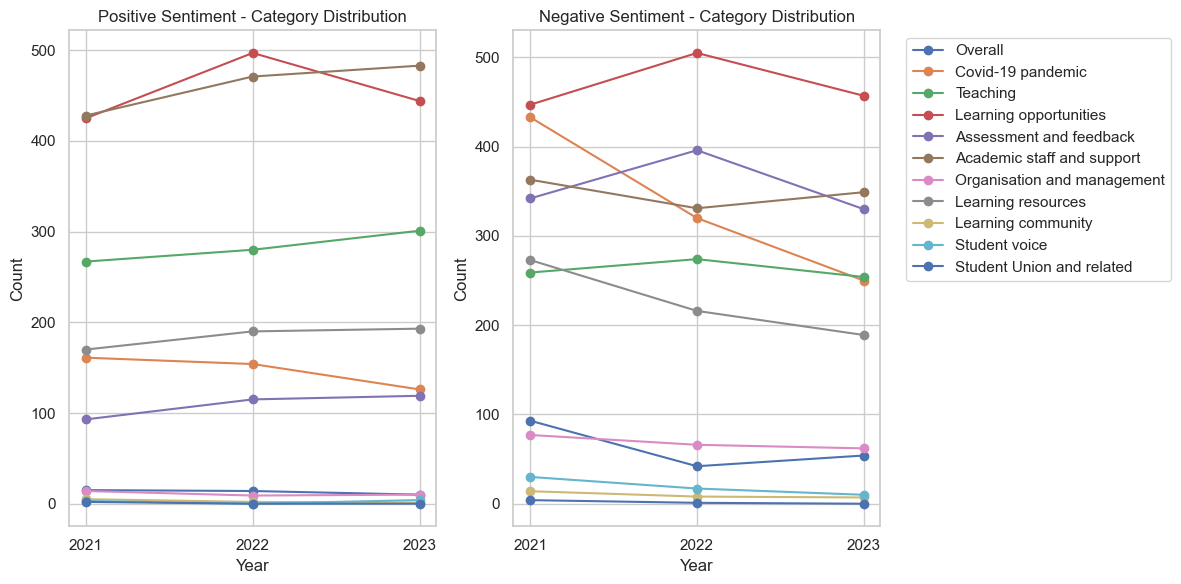

In [259]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame 'all_data' has the following columns:
# Category, Count, Year, Sentiment, Percentage

# Filter data for positive and negative sentiments
positive_data = all_data[all_data['Sentiment'] == 'Positive']
negative_data = all_data[all_data['Sentiment'] == 'Negative']

# Create line charts for positive and negative sentiments separately
plt.figure(figsize=(12, 6))

# Positive sentiment
plt.subplot(1, 2, 1)
for category in positive_data['Category'].unique():
    category_data = positive_data[positive_data['Category'] == category]
    plt.plot(category_data['Year'], category_data['Count'], label=category,marker='o')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Positive Sentiment - Category Distribution')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.xticks(positive_data['Year'].unique())  # Set x-axis ticks to years
plt.grid(True)

# Negative sentiment
plt.subplot(1, 2, 2)
for category in negative_data['Category'].unique():
    category_data = negative_data[negative_data['Category'] == category]
    plt.plot(category_data['Year'], category_data['Count'], label=category,marker='o')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Negative Sentiment - Category Distribution')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.xticks(negative_data['Year'].unique())  # Set x-axis ticks to years
plt.grid(True)

plt.tight_layout()
plt.show()